# Cancer diagnoses after 50 years old


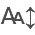

In [2]:
try:
  from itables import(
     init_notebook_mode, show 
    ) 
except:
  !pip install -r https://raw.githubusercontent.com/CancerDataAggregator/Community-Notebooks/main/requirements.txt


import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
import itables.options as opt

opt.classes="display"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0
import os
os.environ['CDA_API_URL'] = 'https://cancerdata.dsde-dev.broadinstitute.org/'

In [3]:
from cdapython import tables, columns, column_values, fetch_rows, summary_counts

I'm a cancer researcher, and I'm interested in profiling cancer occurance as a function of age. I don't have a specific plan yet, but I'd like to see what data is out there for diagnosis ages for various cancers.

First, decide what column to search. I'm looking for columns that have to do with age:

In [4]:
columns(description="age")

table             column data_type  nullable  \
0  diagnosis   age_at_diagnosis   integer      True   
1    subject          ethnicity      text      True   
2    subject               race      text      True   
3  treatment  therapeutic_agent      text      True   

                                         description  
0  The age in days of the individual at the time ...  
1  An individuals self-described social and cultu...  
2  An arbitrary classification of a taxonomic gro...  
3  One or more therapeutic agents as part of this...

age_at_diagnosis is exactly what I need, and the description tells me that ages are in days, so I'm going to start by looking for data for subjects who are over 50, first I'll calculate how many days that is:

In [4]:
50*365

18250

In [ ]:
then run my search:

In [6]:
fetch_rows(table="subject", match_all=["age_at_diagnosis > 18250"])

subject_id cause_of_death  days_to_birth  \
0      Academia Sinica LUAD-100.P002                          <NA>   
1      Academia Sinica LUAD-100.P003                          <NA>   
2      Academia Sinica LUAD-100.P004                          <NA>   
3      Academia Sinica LUAD-100.P005                          <NA>   
4      Academia Sinica LUAD-100.P007                          <NA>   
...                              ...            ...            ...   
26264                   WCDT.DTB-258                          <NA>   
26265                   WCDT.DTB-260                          <NA>   
26266                   WCDT.DTB-261                          <NA>   
26267                   WCDT.DTB-265                          <NA>   
26268                   WCDT.DTB-266                          <NA>   

       days_to_death               ethnicity   race          sex  \
0               <NA>                                        Male   
1               <NA>                                 Unspecified   
2               <NA>                                      Female   
3               <NA>                                        Male   
4               <NA>                                        Male   
...              ...                     ...    ...          ...   
26264           <NA>  not hispanic or latino  white         male   
26265           <NA>  not hispanic or latino  white         male   
26266           <NA>  not hispanic or latino  white         male   
26267           <NA>  not hispanic or latino  asian         male   
26268           <NA>  not hispanic or latino  white         male   

            species vital_status  
0      Homo sapiens               
1      Homo sapiens               
2      Homo sapiens               
3      Homo sapiens               
4      Homo sapiens               
...             ...          ...  
26264  Homo sapiens      Unknown  
26265  Homo sapiens      Unknown  
26266  Homo sapiens      Unknown  
26267  Homo sapiens      Unknown  
26268  Homo sapiens      Unknown  

[26269 rows x 9 columns]

There's quite a lot of data, I'm going to try some age brackets, and switch to calling the researchsubject table so I can see their diagnoses:

In [5]:
60*365

21900

In [7]:
fetch_rows(table="researchsubject", match_all=["age_at_diagnosis > 18250", "age_at_diagnosis < 21900"])

researchsubject_id member_of_research_project  \
0      BEATAML1.0-COHORT.2005          BEATAML1.0-COHORT   
1      BEATAML1.0-COHORT.2007          BEATAML1.0-COHORT   
2      BEATAML1.0-COHORT.2010          BEATAML1.0-COHORT   
3      BEATAML1.0-COHORT.2014          BEATAML1.0-COHORT   
4      BEATAML1.0-COHORT.2017          BEATAML1.0-COHORT   
...                       ...                        ...   
10066      WCDT-MCRPC.DTB-080                 WCDT-MCRPC   
10067      WCDT-MCRPC.DTB-098                 WCDT-MCRPC   
10068      WCDT-MCRPC.DTB-135                 WCDT-MCRPC   
10069      WCDT-MCRPC.DTB-183                 WCDT-MCRPC   
10070      WCDT-MCRPC.DTB-186                 WCDT-MCRPC   

        primary_diagnosis_condition  \
0                    Leukemias, NOS   
1                 Myeloid Leukemias   
2                 Myeloid Leukemias   
3                 Myeloid Leukemias   
4                 Myeloid Leukemias   
...                             ...   
10066  Adenomas and Adenocarcinomas   
10067  Adenomas and Adenocarcinomas   
10068  Adenomas and Adenocarcinomas   
10069  Adenomas and Adenocarcinomas   
10070  Adenomas and Adenocarcinomas   

                              primary_diagnosis_site  
0      Hematopoietic and reticuloendothelial systems  
1      Hematopoietic and reticuloendothelial systems  
2      Hematopoietic and reticuloendothelial systems  
3      Hematopoietic and reticuloendothelial systems  
4      Hematopoietic and reticuloendothelial systems  
...                                              ...  
10066                                 Prostate gland  
10067                                 Prostate gland  
10068                                 Prostate gland  
10069                                 Prostate gland  
10070                                 Prostate gland  

[10071 rows x 4 columns]